In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2209,ham,"Hmm well, night night",NaN,NaN,NaN
2240,ham,K I'll call you when I'm close,NaN,NaN,NaN
3957,ham,So i could kiss and feel you next to me...,NaN,NaN,NaN
5317,ham,"K, fyi I'm back in my parents' place in south ...",NaN,NaN,NaN
5297,ham,My darling sister. How are you doing. When's s...,NaN,NaN,NaN


Data Cleaning 

1.Lets drop unnecessary columns

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(columns,axis=1,inplace= True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace = True)

In [8]:
df.columns

Index(['target', 'text'], dtype='object')

In [9]:
def assign(s):
    if s== 'ham':
        return 0
    else:
        return 1

In [10]:
df['target'] = df['target'].apply(assign)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

Exploratory Data Analysis

In [14]:
import seaborn as sns

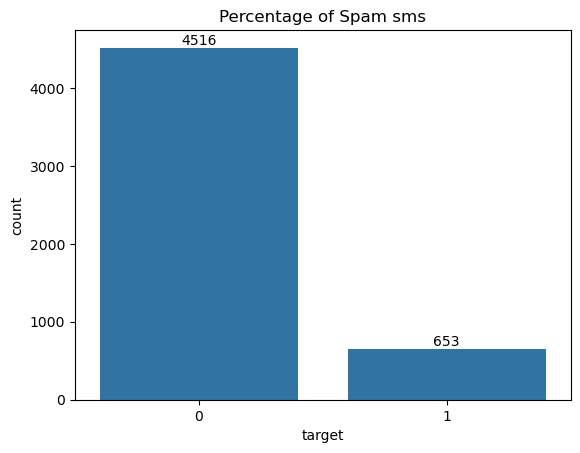

In [15]:
ax = sns.countplot(x='target',data=df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of Spam sms')
plt.show()

Creating three columns for number of characters , number of words and number of sentences in a text message.

In [16]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Nimisha
[nltk_data]     Manawat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [19]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_words','num_characters','num_sentence']].describe()

,num_words,num_characters,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,18.455794,78.977945,1.965564
std,13.324758,58.236293,1.448541
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,38.000000


In [23]:
#ham messages
df[df['target'] == 0][['num_words','num_characters','num_sentence']].describe()

,num_words,num_characters,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,17.123782,70.459256,1.820195
std,13.493970,56.358207,1.383657
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,38.000000


In [24]:
#spam messages
df[df['target'] == 1][['num_words','num_characters','num_sentence']].describe()

,num_words,num_characters,num_sentence
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.970904
std,7.008418,30.137753,1.488425
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


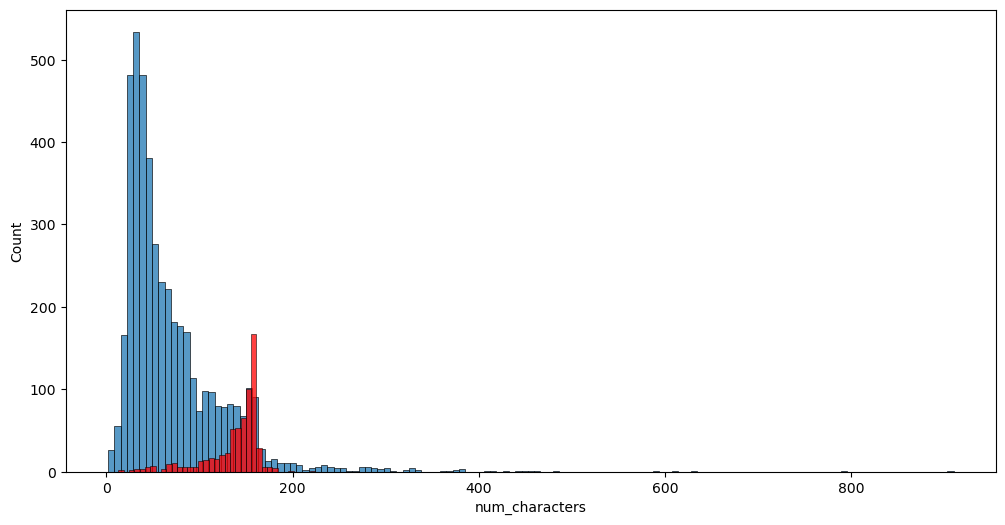

In [25]:
plt.figure(figsize = (12,6))
sns.histplot(x=df[df['target'] == 0]['num_characters'])
sns.histplot(x=df[df['target'] == 1]['num_characters'] ,color = 'red')
plt.show()

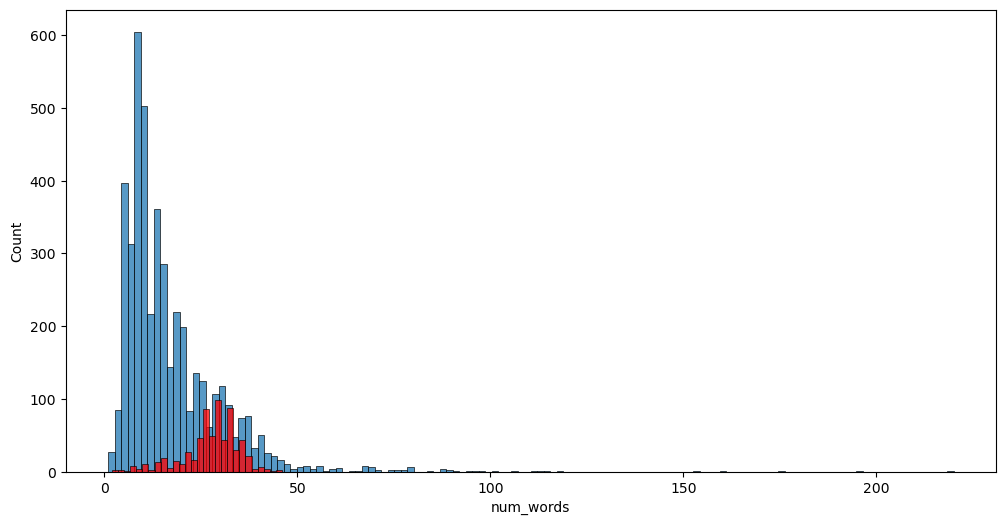

In [26]:
plt.figure(figsize = (12,6))
sns.histplot(x=df[df['target'] == 0]['num_words'])
sns.histplot(x=df[df['target'] == 1]['num_words'] ,color = 'red')
plt.show()

In [27]:
#correlations within columns 
df[['num_words','num_characters','num_sentence']].corr()


,num_words,num_characters,num_sentence
num_words,1.000000,0.965760,0.679971
num_characters,0.965760,1.000000,0.624139
num_sentence,0.679971,0.624139,1.000000


<Axes: >

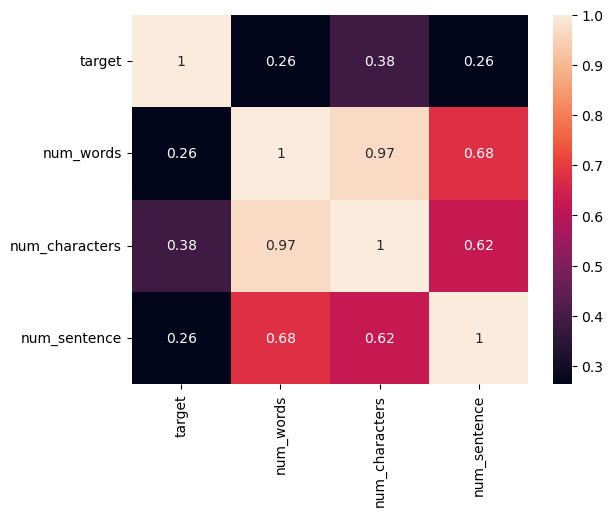

In [28]:
sns.heatmap(df[['target','num_words','num_characters','num_sentence']].corr(),annot =True)

Data preprocessing , we'll convert text to a particular format removing punctuations,stopwords and special characters.

In [29]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string 

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Nimisha
[nltk_data]     Manawat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
def transform(wo):
    wo = wo.lower()
    wo = nltk.word_tokenize(wo)
    y = []
    for i in wo:
        if i not in  stopwords.words('english') and i not in string.punctuation and i.isalnum():
            y.append(ps.stem(i))
    return " ".join(y)

transform("did you like my presentation on Machine Learning?")

'like present machin learn'

In [35]:
df['transformed_text'] = df['text'].apply(transform)
df['transformed_text'].info()

<class 'pandas.core.series.Series'>
Index: 5169 entries, 0 to 5571
Series name: transformed_text
Non-Null Count  Dtype 
--------------  ----- 
5169 non-null   object
dtypes: object(1)
memory usage: 80.8+ KB


In [36]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500,min_font_size=10,background_color = 'white')
wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

In [38]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [39]:
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500,min_font_size=10,background_color = 'white')


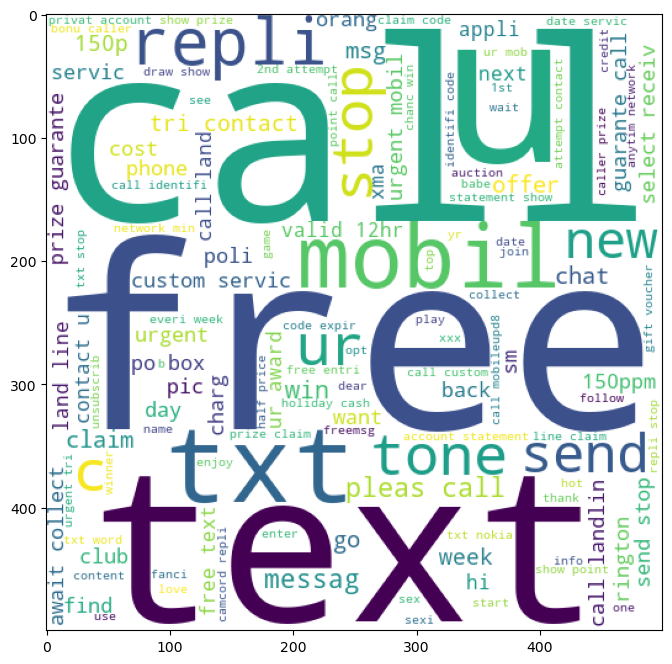

In [40]:
wcim = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(8,8))
plt.imshow(wcim)


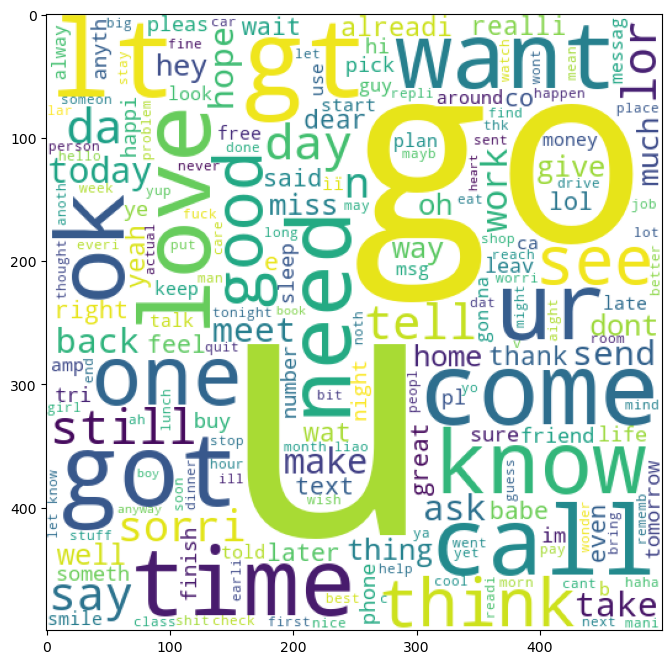

In [37]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(8,8))
plt.imshow(ham_wc)


In [116]:
l = df[df['target']==1]['transformed_text'].tolist()
spam_wcs = []
for msg in l:
    for word in msg.split():
        spam_wcs.append(word)



['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

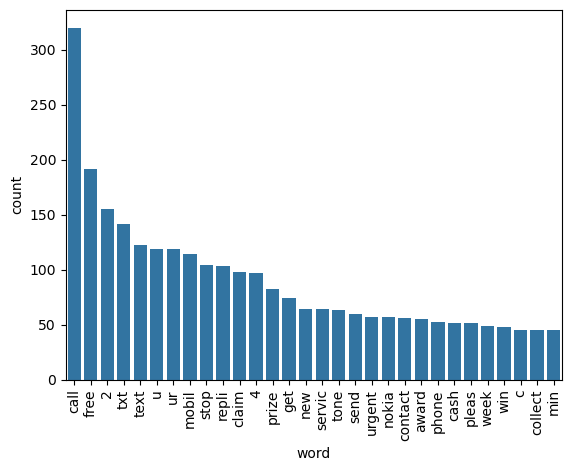

In [39]:

from collections import Counter

top_words = Counter(spam_wcs).most_common(30)
nd = pd.DataFrame(top_words,columns=['word','count'])
sns.barplot(x =nd['word'],y="count",data = nd)

plt.xticks(rotation ="vertical")
plt.show()

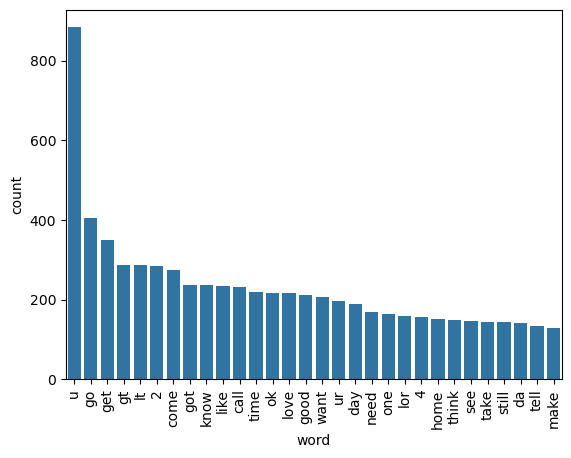

In [40]:
ham_l = df[df['target']==0]['transformed_text'].tolist()
ham_wcs = []
for msg in ham_l:
    for word in msg.split():
        ham_wcs.append(word)

top_words = Counter(ham_wcs).most_common(30)
nd = pd.DataFrame(top_words,columns=['word','count'])
sns.barplot(x =nd['word'],y="count",data = nd)

plt.xticks(rotation ="vertical")
plt.show()

Model Building

In [117]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
#to improve model performance , lets get only most accured words
Tfidf2 = TfidfVectorizer( max_features=15000,
    ngram_range=(1,2),     
    min_df=2,              
    max_df=0.9,           
    stop_words='english')

In [118]:
x = cv.fit_transform(df['transformed_text']).toarray()
x_ = Tfidf2.fit_transform(df['transformed_text']).toarray()



## print(x.shape)
x_.shape

In [119]:
y = df['target'].values


In [120]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x_, y, stratify=y, test_size=0.2, random_state=42
)

In [123]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [124]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [125]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8936170212765957
[[814  89]
 [ 21 110]]
0.5527638190954773


In [126]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9680851063829787
[[902   1]
 [ 32  99]]
0.99


In [127]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9729206963249516
[[903   0]
 [ 28 103]]
1.0


#the precision score of bournolli is good with TfidfVectorizer , Lets try diffirent algorihtms

In [128]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [129]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knn = KNeighborsClassifier()
lcr = LogisticRegression(solver='liblinear',penalty='l1')
dtc = DecisionTreeClassifier(max_depth =5)
rdf = RandomForestClassifier(n_estimators = 50,random_state=2)

In [130]:
C_Models = {
    "SVC":svc,
    "KNN":knn,
    "LCR":lcr,
    "DTC":dtc,
    "RDF":rdf,
    "NB":mnb,
}

In [131]:
def model_train(M,X_train,Y_train,X_test,Y_test):
    M.fit(X_train,Y_train)
    y_pred = M.predict(X_test)
    AC_score = accuracy_score(Y_test,y_pred)
    PC_score = precision_score(Y_test,y_pred)
    print(classification_report(Y_test, y_pred))
    report = classification_report(Y_test, y_pred, output_dict=True)
    recall_spam = report['1']['recall']

    return AC_score,PC_score,recall_spam

In [132]:
model_train(svc,X_train,Y_train,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.97      0.85      0.91       131

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



(0.9777562862669246, 0.9736842105263158, 0.8473282442748091)

In [80]:
accuracy_scores = []
precision_scores = []
recall_spam = []
for name,clf in C_Models.items():
    accuracy,precision,spamr = model_train(clf,X_train,Y_train,X_test,Y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_spam.append(spamr)
print(precision_scores)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.98      0.84      0.91       131

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       903
           1       1.00      0.18      0.31       131

    accuracy                           0.90      1034
   macro avg       0.95      0.59      0.63      1034
weighted avg       0.91      0.90      0.86      1034

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       903
           1       0.93      0.69      0.79       131

    accuracy                           0.95      1034
   macro avg       0.94      0.84      0.88      1034
weighted avg       0.95      0.95      0.95      1034

              preci

In [82]:
Model_results = pd.DataFrame({"Algorithm":C_Models.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores,"Recall_spam":recall_spam}).sort_values('Recall_spam',ascending=False)

In [83]:
Model_results
#this are after max_feature limit

,Algorithm,Accuracy,Precision,Recall_spam
0,SVC,0.977756,0.982143,0.839695
4,RDF,0.970019,0.980769,0.778626
5,NB,0.968085,0.990000,0.755725
2,LCR,0.953578,0.927835,0.687023
3,DTC,0.936170,0.891566,0.564885
1,KNN,0.896518,1.000000,0.183206


#Lets Go with Naive bayes,now accoding to recall spam ,lets try Support vector machines

In [134]:
import pickle 
pickle.dump(Tfidf2,open('vectorizer3.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(svc,open('model2.pkl','wb'))
pickle.dump(bnb,open('model3.pkl','wb'))
pickle.dump(svc,open('model4.pkl','wb'))
pickle.dump(Tfidf2,open('vectorizer4.pkl','wb'))

In [115]:
print("free" in Tfidf.vocabulary_)
print("iphon" in Tfidf.vocabulary_)
print("click" in Tfidf.vocabulary_)
print("claim" in Tfidf.vocabulary_)

True
False
True
True
